# EDA

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/eloic/Google Drive/EOI/TFM//01_MANT_PREDICTIVO'

Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'
validacion = 'validacion.csv'

Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)
validacion = pd.read_csv(ruta_proyecto + '/02_Datos/02_Validacion/' + validacion)

## EDA CATEGÓRICAS

### Análisis estadístico

In [5]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [6]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
60,dia_mes,31,0.018906
32,dia_mes,3,0.028461
54,dia_mes,25,0.030291
59,dia_mes,30,0.030291
30,dia_mes,1,0.030697
...,...,...,...
4,operador,Operator5,0.111405
7,operador,Operator8,0.112015
3,operador,Operator4,0.113438
2,operador,Operator3,0.114048


También analizamos el dataset de validación para ver cuantos han tocado Yes o False.

In [7]:
validacion.Failure.value_counts(normalize = True)

No     0.985294
Yes    0.014706
Name: Failure, dtype: float64

Como es típico en este tipo de proyectos, la variable fallo tiene muy pocos Yes, lo que podemos ver con anterioridad que puede ser muy interesante un balanceo antes de modelar.

### Análisis gráfico

In [8]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

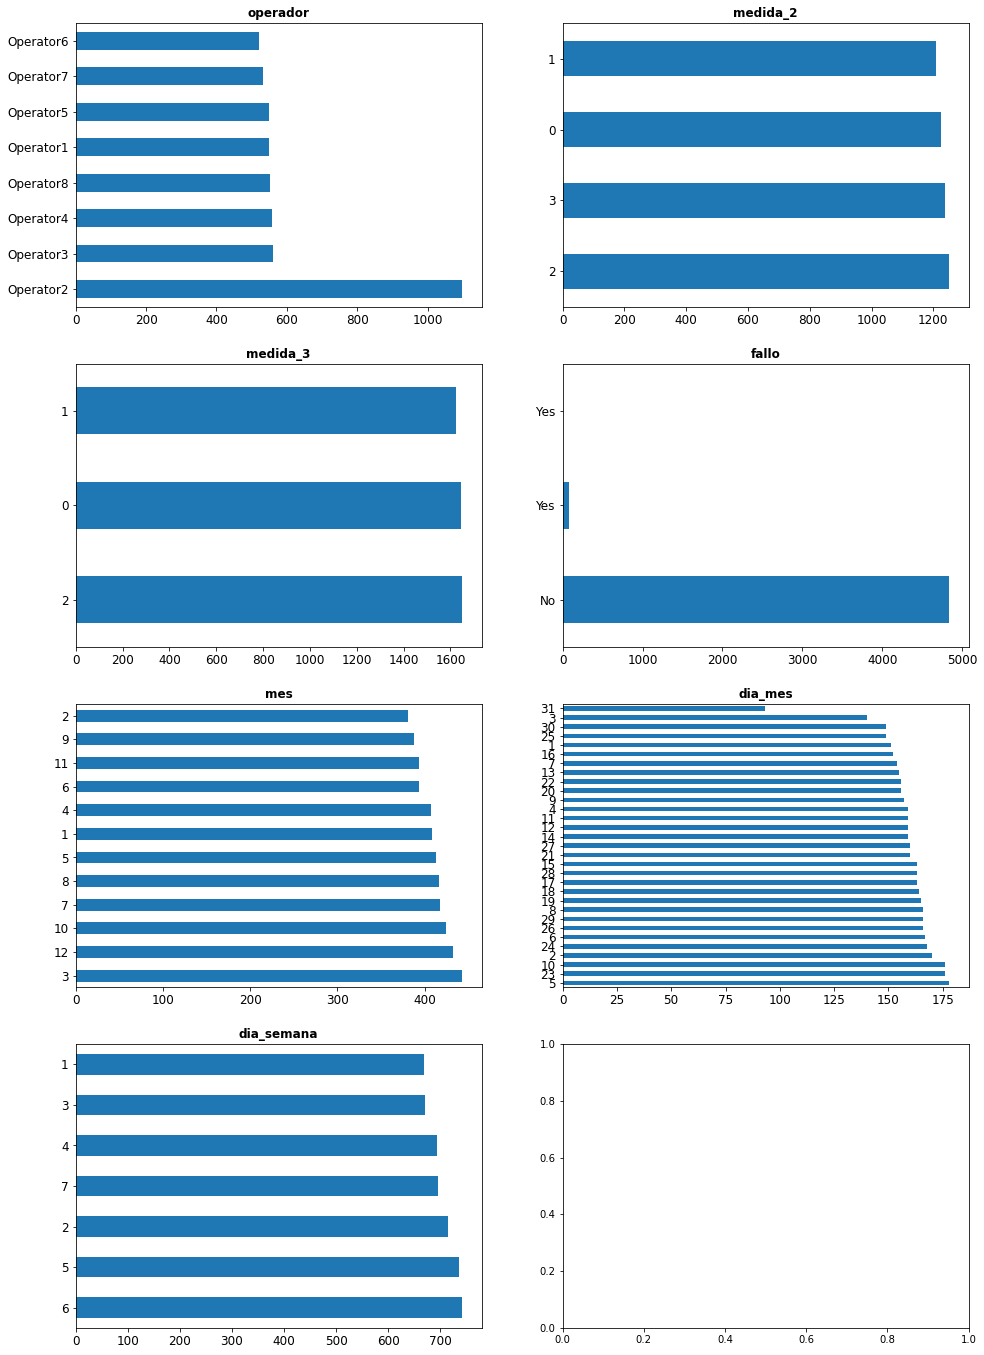

In [9]:
graficos_eda_categoricos(cat)

## EDA NUMÉRICAS

### Análisis estadístico

In [10]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [11]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
temperatura,4919.0,64.042285,64.0,2.688339,50.0,62.0,64.0,66.0,78.0
humedad,4919.0,83.288880,83.0,4.831409,65.0,80.0,83.0,87.0,120.0
medida_1,4919.0,1101.538118,1106.0,536.224896,155.0,644.0,1106.0,1566.0,2011.0
medida_4,4919.0,1070.295995,1058.0,540.806449,155.0,599.5,1058.0,1542.0,2011.0
medida_5,4919.0,1072.130108,1073.0,534.274781,155.0,599.0,1073.0,1542.0,2011.0
medida_6,4919.0,1076.890222,1079.0,535.667878,155.0,619.0,1079.0,1540.0,2010.0
medida_7,4919.0,1087.268551,1087.0,541.448230,155.0,609.0,1087.0,1563.0,2011.0
medida_8,4919.0,1075.436064,1075.0,536.974351,155.0,605.5,1075.0,1534.0,2011.0
medida_9,4919.0,1081.794470,1082.0,531.684060,155.0,628.0,1082.0,1524.5,2011.0
medida_10,4919.0,1069.930677,1058.0,536.870423,155.0,611.5,1058.0,1532.0,2011.0


### Análisis gráfico

In [12]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

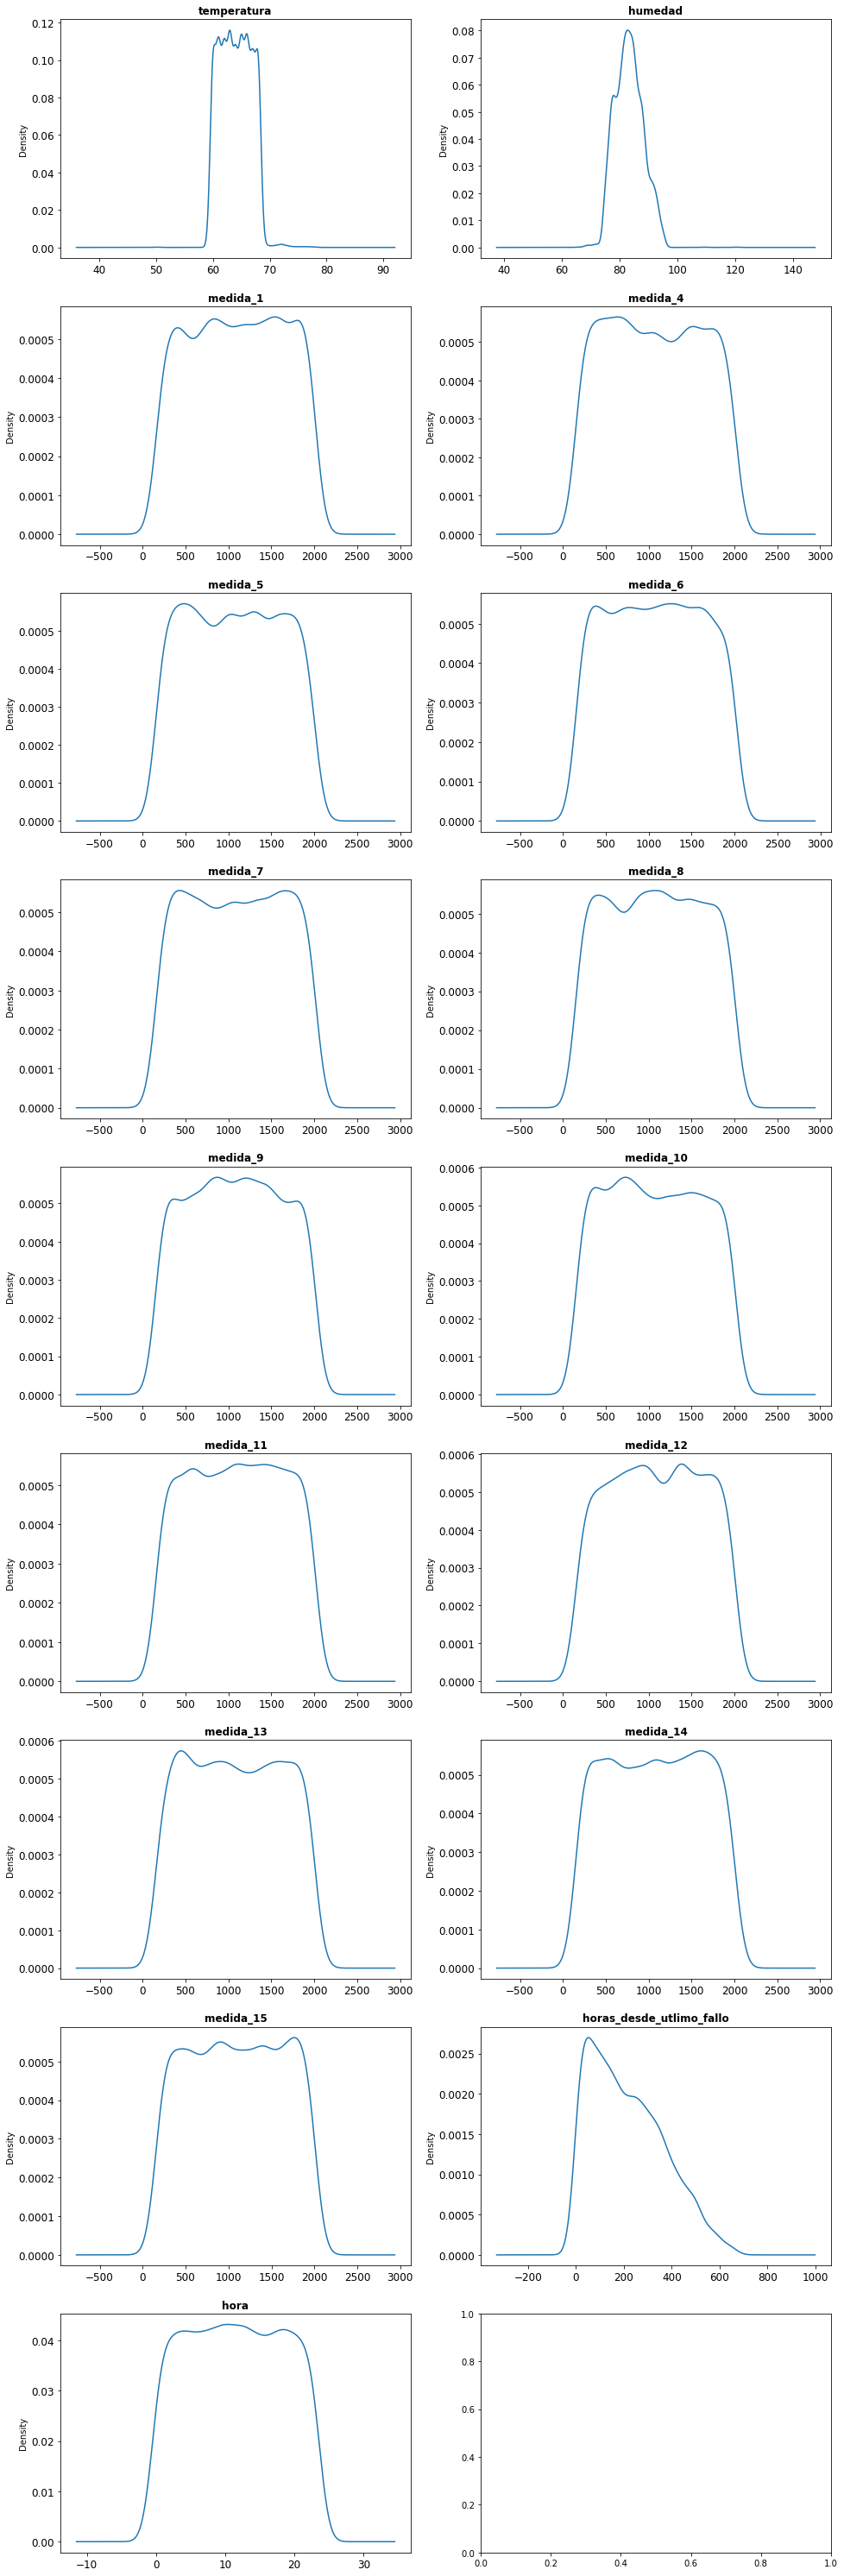

In [13]:
graficos_eda_continuas(num)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [14]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [15]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)